In [1]:
import random
from copy import deepcopy
from scipy import interpolate
import numpy as np
#from dtaidistance import dtwimport matplotlib.pyplot as pltfrom _plotly_future_ import v4_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots



In [82]:
# calculate the spearman's correlation between two variables
import matplotlib.pyplot as plt
import seaborn as sns
# seed random number generator
seed(1)

In [3]:
import pandas as pd

In [4]:
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

In [5]:
x

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [6]:
x.corr(y, method='spearman') # we can calculate the spearman correlation coefficient in this way. 

0.9757575757575757

In [7]:
df1 = pd_csv('Delhi/Delhi_Temp_28.2_76.9_1979_2019AnomalWind.csv')

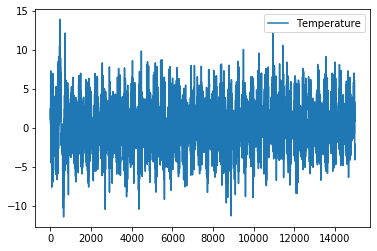

In [9]:
df1.plot()

In [12]:
df2 = pd.read_csv('TN/TamilNadu_Temp_10.0_78.0_1979_2019AnomalWind.csv')

In [13]:
df2['Temperature'].corr(df1['Temperature'], method = 'spearman')

0.006792007766698605

In [14]:
df3 = pd.read_csv('Delhi/Delhi_Temp_28.2_77.0_1979_2019AnomalWind.csv')

In [15]:
df3['Temperature'].corr(df1['Temperature'], method = 'spearman')

0.9544254117906009

Now, we have to see how we can perform the clustering. 
First, we will load all the datasets and store them in a series_list

In [28]:
rs = pd.DataFrame(data = [df1['Temperature'], df2['Temperature']])

In [18]:
rs.append(df3['Temperature'])

,0,1,2,3,4,5,6,7,8,9,...,14965,14966,14967,14968,14969,14970,14971,14972,14973,14974
Temperature,0.537699,0.621067,2.462906,1.882762,0.802468,0.846376,1.020532,1.111456,2.331930,2.028524,...,2.238667,1.714820,0.624109,0.327071,-1.002292,-1.333279,-2.149700,-0.711593,-4.138827,-2.120206
Temperature,0.896693,1.248925,-0.136942,-0.973411,-1.006602,-1.136671,0.302514,-0.245363,1.284390,1.850199,...,2.116494,2.180923,3.464388,3.563403,3.166792,2.076911,1.152919,1.908889,2.065993,2.511864
Temperature,0.928705,1.067332,2.741260,1.961421,1.138367,1.372278,1.149940,1.245969,2.333475,1.877484,...,2.100370,1.883063,0.710791,0.257038,-1.166799,-1.277817,-2.804084,-0.782102,-3.605197,-2.180201


In [50]:
series_list

[]

In [47]:
series_list.append(df1['Temperature'])

In [41]:
rs = list((df1['Temperature'], df2['Temperature']))

In [49]:
series_list = list()

In [44]:
latitudes = np.linspace(28.2, 28.6, num=5)
longitudes = np.linspace(76.9 ,77.3, num = 5)

In [51]:
latitudes = np.linspace(28.2, 28.6, num=5)
longitudes = np.linspace(76.9 ,77.3, num = 5)
for lat in latitudes:
    for lon in longitudes:
        dfExtr = pd.read_csv('Delhi/Delhi_Temp_' + str(lat) +'_'+str(lon)+ '_1979_2019AnomalWind.csv')
        series_list.append(dfExtr)

In [52]:
len(series_list) # delhi added

25

In [53]:
#lon = 75 to 76 -> this was the earilier location for rajasthan -> jaipur and it's neighbours
latitudes = np.linspace(26, 27, num=5)
longitudes = np.linspace(75 ,76, num = 5)

In [54]:
#lon = 75 to 76 -> this was the earilier location for rajasthan -> jaipur and it's neighbours
latitudes = np.linspace(26, 27, num=5)
longitudes = np.linspace(75 ,76, num = 5)
print('Doing for Rajasthan')
for lat in latitudes:
    for lon in longitudes:
        dfExtr = pd.read_csv('Raj/Rajas_Temp_' + str(lat) +'_'+str(lon)+ '_1979_2019AnomalWind.csv')
        series_list.append(dfExtr)

In [55]:
len(series_list) # rajasthan added

50

In [57]:
#lon = 78 to 79 -> this was the earilier location for Tamil Nadu 
latitudes = np.linspace(10, 11, num=5)
longitudes = np.linspace(78 ,79, num = 5)
print('Doing for Tamil Nadu')
for lat in latitudes:
    for lon in longitudes:
        dfExtr = pd.read_csv('TN/TamilNadu_Temp_' + str(lat) +'_'+str(lon)+ '_1979_2019AnomalWind.csv')
        series_list.append(dfExtr)

In [58]:
len(series_list) # TN added

75

In [59]:
#lon = 78 to 79 -> this was the earilier location for West Bengal
latitudes = np.linspace(22, 23, num=5)
longitudes = np.linspace(88 ,89, num = 5)

In [60]:
#lon = 78 to 79 -> this was the earilier location for West Bengal
latitudes = np.linspace(22, 23, num=5)
longitudes = np.linspace(88 ,89, num = 5)
print('Doing for West Bengal')
for lat in latitudes:
    for lon in longitudes:
        dfExtr = pd.read_csv('WB/WestBengal_Temp_' + str(lat) +'_'+str(lon)+ '_1979_2019AnomalWind.csv')
        series_list.append(dfExtr)

In [61]:
len(series_list) # west bengal added

100

Now, we have to calculate the distance matrix

In [64]:
n_series = len(series_list)
distance_matrix = np.zeros(shape=(n_series, n_series))



In [70]:
x= series_list[0]

In [71]:
y = series_list[1]

In [74]:
x['Temperature'].corr(y['Temperature'], method = 'spearman')

0.954425411790601

In [75]:
n_series = len(series_list)
distance_matrix = np.zeros(shape=(n_series, n_series))

# Build distance matrix
for i in range(n_series):
    for j in range(n_series):
        x = series_list[i]
        y = series_list[j]
        if i != j:
            dist = x['Temperature'].corr(y['Temperature'], method = 'spearman')
            distance_matrix[i, j] = dist

In [84]:
for i in range(n_series):
    distance_matrix[i, i] = 1.0

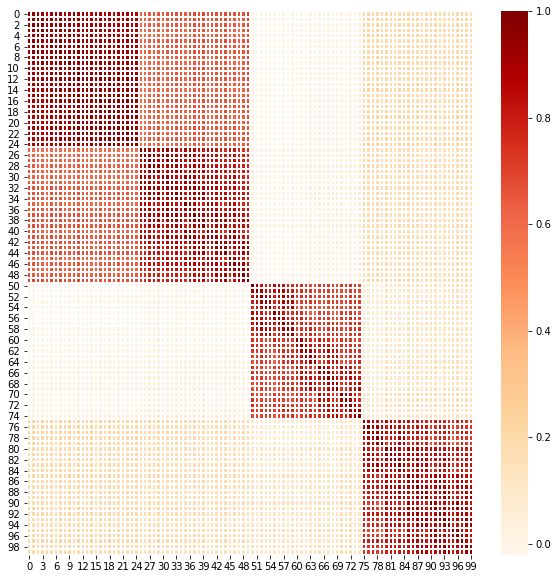

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(
    distance_matrix,
    cmap='OrRd',linewidth=1)

In [86]:
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram

def hierarchical_clustering(dist_mat, method='complete'):
    if method == 'complete':
        Z = complete(distance_matrix)
    if method == 'single':
        Z = single(distance_matrix)
    if method == 'average':
        Z = average(distance_matrix)
    if method == 'ward':
        Z = ward(distance_matrix)
    
    fig = plt.figure(figsize=(16, 8))
    dn = dendrogram(Z)
    plt.title(f"Dendrogram for {method}-linkage with correlation distance")
    plt.show()
    
    return Z

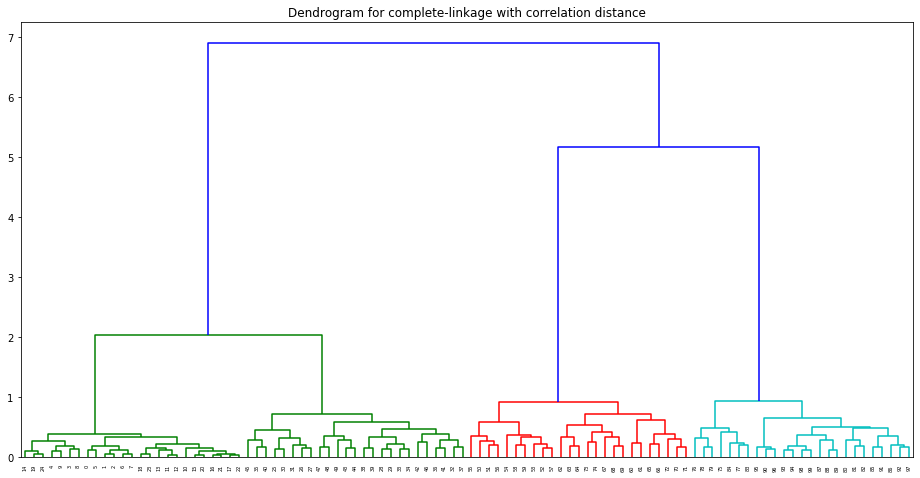

In [87]:

linkage_matrix = hierarchical_clustering(distance_matrix)

In [88]:
from scipy.cluster.hierarchy import fcluster

# select maximum number of clusters
cluster_labels = fcluster(linkage_matrix, 4, criterion='maxclust')
print(np.unique(cluster_labels))
#>> 4 unique clusters
cluster_labels = fcluster(linkage_matrix, 10, criterion='maxclust')
print(np.unique(cluster_labels))
#>> 10 unique clusters

# hand-select an appropriate cut-off on the dendrogram
cluster_labels = fcluster(linkage_matrix, 600, criterion='distance')
print(np.unique(cluster_labels))
#>> 3 unique clusters
cluster_labels = fcluster(linkage_matrix, 800, criterion='distance')
print(np.unique(cluster_labels))

[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10]
[1]
[1]


In [89]:
linkage_matrix

array([[1.60000000e+01, 2.10000000e+01, 4.06015592e-02, 2.00000000e+00],
       [1.70000000e+01, 2.20000000e+01, 4.30850363e-02, 2.00000000e+00],
       [1.10000000e+01, 1.20000000e+01, 4.62881933e-02, 2.00000000e+00],
       [1.50000000e+01, 2.00000000e+01, 4.63119881e-02, 2.00000000e+00],
       [1.90000000e+01, 2.40000000e+01, 4.83808558e-02, 2.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.85713915e-02, 2.00000000e+00],
       [1.80000000e+01, 2.30000000e+01, 4.92747954e-02, 2.00000000e+00],
       [1.00000000e+02, 1.01000000e+02, 5.07672867e-02, 4.00000000e+00],
       [6.00000000e+00, 7.00000000e+00, 5.22663359e-02, 2.00000000e+00],
       [1.40000000e+01, 1.04000000e+02, 1.00785457e-01, 3.00000000e+00],
       [1.03000000e+02, 1.07000000e+02, 1.01349391e-01, 6.00000000e+00],
       [4.00000000e+00, 9.00000000e+00, 1.07444372e-01, 2.00000000e+00],
       [9.30000000e+01, 9.40000000e+01, 1.16861743e-01, 2.00000000e+00],
       [1.30000000e+01, 1.02000000e+02, 1.17910921e

In [90]:
series_list = list()
latitudes = np.linspace(28.2, 28.6, num=5)
longitudes = np.linspace(76.9 ,77.3, num = 5)
print('Doing for Delhi')
for lat in latitudes:
    for lon in longitudes:
        dfExtr = pd.read_csv('Delhi/Delhi_Temp_' + str(lat) +'_'+str(lon)+ '_1979_2019Anomal.csv')
        series_list.append(dfExtr)
#lon = 75 to 76 -> this was the earilier location for rajasthan -> jaipur and it's neighbours
latitudes = np.linspace(26, 27, num=5)
longitudes = np.linspace(75 ,76, num = 5)
print('Doing for Rajasthan')
for lat in latitudes:
    for lon in longitudes:
        dfExtr = pd.read_csv('Raj/Rajas_Temp_' + str(lat) +'_'+str(lon)+ '_1979_2019Anomal.csv')
        series_list.append(dfExtr)
#lon = 78 to 79 -> this was the earilier location for Tamil Nadu 
latitudes = np.linspace(10, 11, num=5)
longitudes = np.linspace(78 ,79, num = 5)
print('Doing for Tamil Nadu')
for lat in latitudes:
    for lon in longitudes:
        dfExtr = pd.read_csv('TN/TamilNadu_Temp_' series_list = list()
latitudes = np.linspace(28.2, 28.6, num=5)
longitudes = np.linspace(76.9 ,77.3, num = 5)
print('Doing for Delhi')
for lat in latitudes:
    for lon in longitudes:
        dfExtr = pd.read_csv('Delhi/Delhi_Temp_' + str(lat) +'_'+str(lon)+ '_1979_2019Anomal.csv')
        series_list.append(dfExtr)
#lon = 75 to 76 -> this was the earilier location for rajasthan -> jaipur and it's neighbours
latitudes = np.linspace(26, 27, num=5)
longitudes = np.linspace(75 ,76, num = 5)
print('Doing for Rajasthan')
for lat in latitudes:
    for lon in longitudes:
        dfExtr = pd.read_csv('Raj/Rajas_Temp_' + str(lat) +'_'+str(lon)+ '_1979_2019Anomal.csv')
        series_list.append(dfExtr)
#lon = 78 to 79 -> this was the earilier location for Tamil Nadu 
latitudes = np.linspace(10, 11, num=5)
longitudes = np.linspace(78 ,79, num = 5)
print('Doing for Tamil Nadu')
for lat in latitudes:
    for lon in longitudes:
        dfExtr = pd.read_csv('TN/TamilNadu_Temp_' + str(lat) +'_'+str(lon)+ '_1979_2019Anomal.csv')
        series_list.append(dfExtr)
#lon = 78 to 79 -> this was the earilier location for West Bengal
latitudes = np.linspace(22, 23, num=5)
longitudes = np.linspace(88 ,89, num = 5)
print('Doing for West Bengal')
for lat in latitudes:
    for lon in longitudes:
        dfExtr = pd.read_csv('WB/WestBengal_Temp_' + str(lat) +'_'+str(lon)+ '_1979_2019Anomal.csv')
        series_list.append(dfExtr)+ str(lat) +'_'+str(lon)+ '_1979_2019Anomal.csv')
        series_list.append(dfExtr)
#lon = 78 to 79 -> this was the earilier location for West Bengal
latitudes = np.linspace(22, 23, num=5)
longitudes = np.linspace(88 ,89, num = 5)
print('Doing for West Bengal')
for lat in latitudes:
    for lon in longitudes:
        dfExtr = pd.read_csv('WB/WestBengal_Temp_' + str(lat) +'_'+str(lon)+ '_1979_2019Anomal.csv')
        series_list.append(dfExtr)

Doing for Delhi
Doing for Rajasthan
Doing for Tamil Nadu
Doing for West Bengal


In [91]:
n_series = len(series_list)
distance_matrix = np.zeros(shape=(n_series, n_series))

# Build distance matrix
for i in range(n_series):
    for j in range(n_series):
        x = series_list[i]
        y = series_list[j]
        if i != j:
            dist = x['Temperature'].corr(y['Temperature'], method = 'spearman')
            distance_matrix[i, j] = dist
for i in range(n_series):
    distance_matrix[i, i] = 1.0

In [93]:
for i in range(n_series):
    distance_matrix[i, i] = 1.0

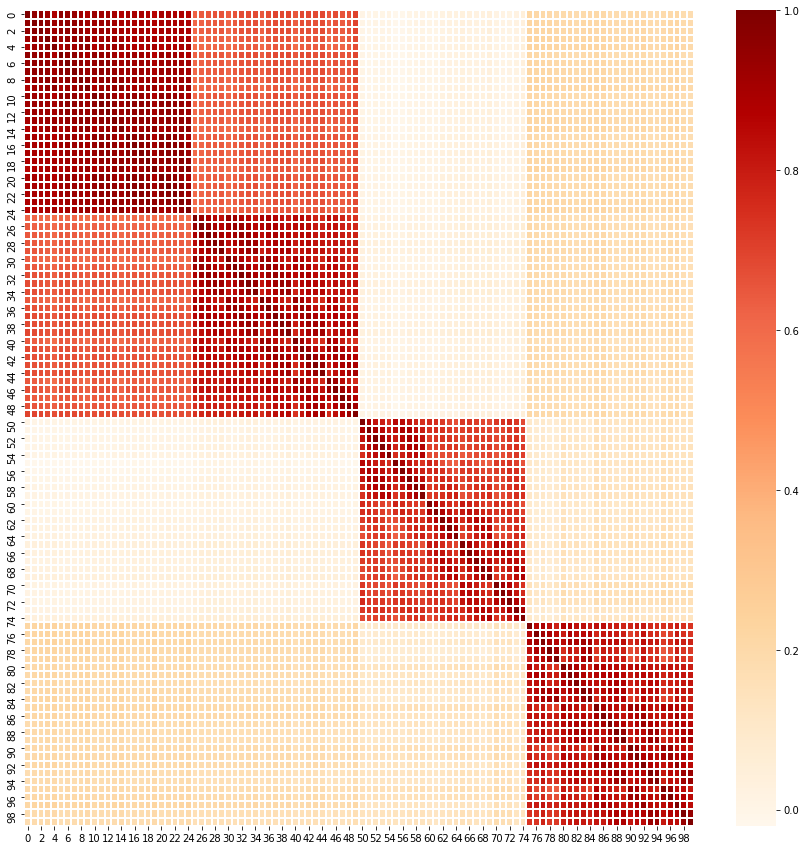

In [94]:
plt.figure(figsize=(15,15))
sns.heatmap(
    distance_matrix,
    cmap='OrRd',linewidth=1)

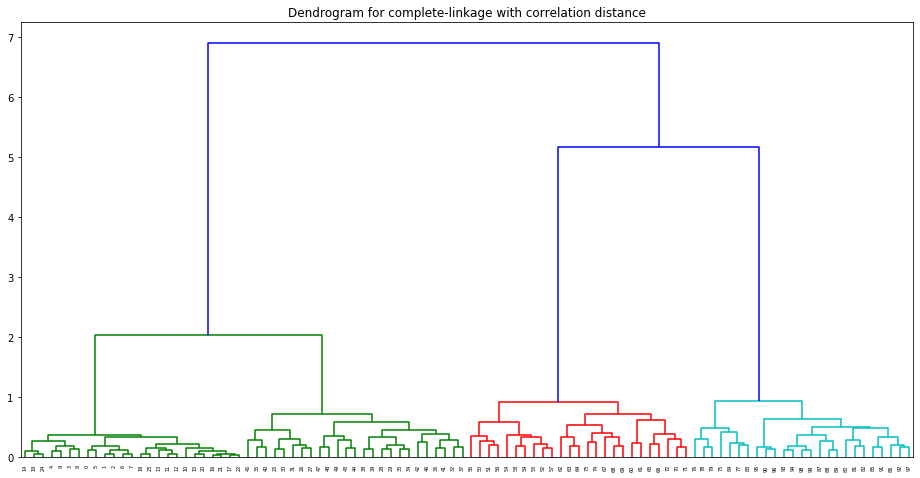

In [95]:
linkage_matrix = hierarchical_clustering(distance_matrix)

In [96]:
series_list = list()
latitudes = np.linspace(28.2, 28.6, num=5)
longitudes = np.linspace(76.9 ,77.3, num = 5)
print('Doing for Delhi')
for lat in latitudes:
    for lon in longitudes:
        dfExtr = pd.read_csv('Delhi/Delhi_Temp_' + str(lat) +'_'+str(lon)+ '_1979_2019.csv')
        series_list.append(dfExtr)
#lon = 75 to 76 -> this was the earilier location for rajasthan -> jaipur and it's neighbours
latitudes = np.linspace(26, 27, num=5)
longitudes = np.linspace(75 ,76, num = 5)
print('Doing for Rajasthan')
for lat in latitudes:
    for lon in longitudes:
        dfExtr = pd.read_csv('Raj/Rajas_Temp_' + str(lat) +'_'+str(lon)+ '_1979_2019.csv')
        series_list.append(dfExtr)
#lon = 78 to 79 -> this was the earilier location for Tamil Nadu 
latitudes = np.linspace(10, 11, num=5)
longitudes = np.linspace(78 ,79, num = 5)
print('Doing for Tamil Nadu')
for lat in latitudes:
    for lon in longitudes:
        dfExtr = pd.read_csv('TN/TamilNadu_Temp_' + str(lat) +'_'+str(lon)+ '_1979_2019.csv')
        series_list.append(dfExtr)
#lon = 78 to 79 -> this was the earilier location for West Bengal
latitudes = np.linspace(22, 23, num=5)
longitudes = np.linspace(88 ,89, num = 5)
print('Doing for West Bengal')
for lat in latitudes:
    for lon in longitudes:
        dfExtr = pd.read_csv('WB/WestBengal_Temp_' + str(lat) +'_'+str(lon)+ '_1979_2019.csv')
        series_list.append(dfExtr)

Doing for Delhi
Doing for Rajasthan
Doing for Tamil Nadu
Doing for West Bengal


In [97]:
n_series = len(series_list)
distance_matrix = np.zeros(shape=(n_series, n_series))

# Build distance matrix
for i in range(n_series):
    for j in range(n_series):
        x = series_list[i]
        y = series_list[j]
        if i != j:
            dist = x['Temperature'].corr(y['Temperature'], method = 'spearman')
            distance_matrix[i, j] = dist
for i in range(n_series):
    distance_matrix[i, i] = 1.0

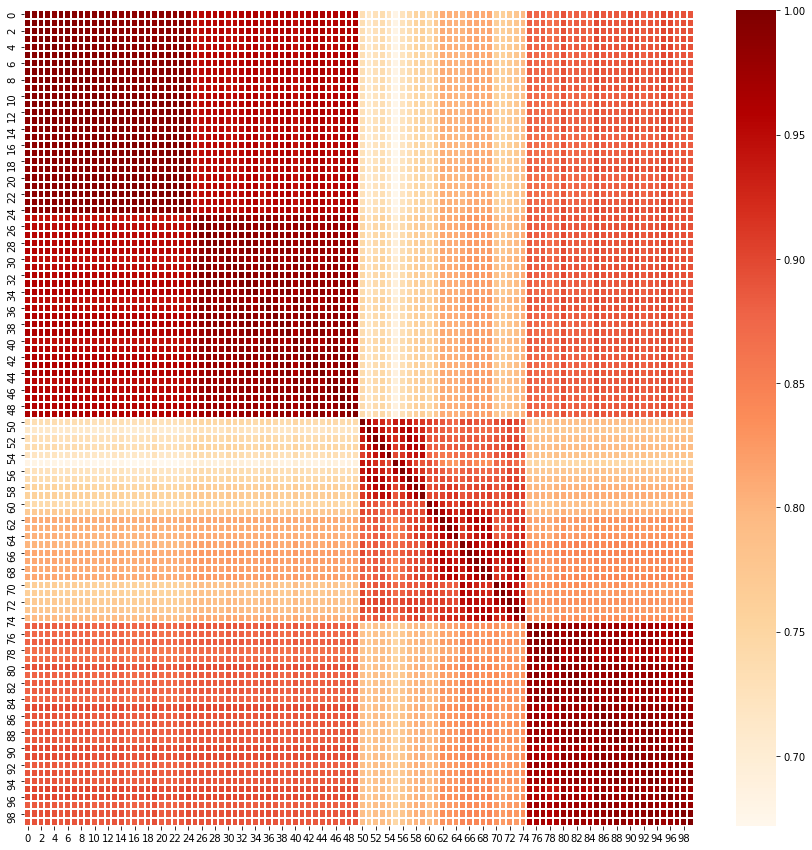

In [98]:
plt.figure(figsize=(15,15))
sns.heatmap(
    distance_matrix,
    cmap='OrRd',linewidth=1)

In [100]:
x['Temperature'].corr(x['Temperature'], method = 'spearman')

1.0

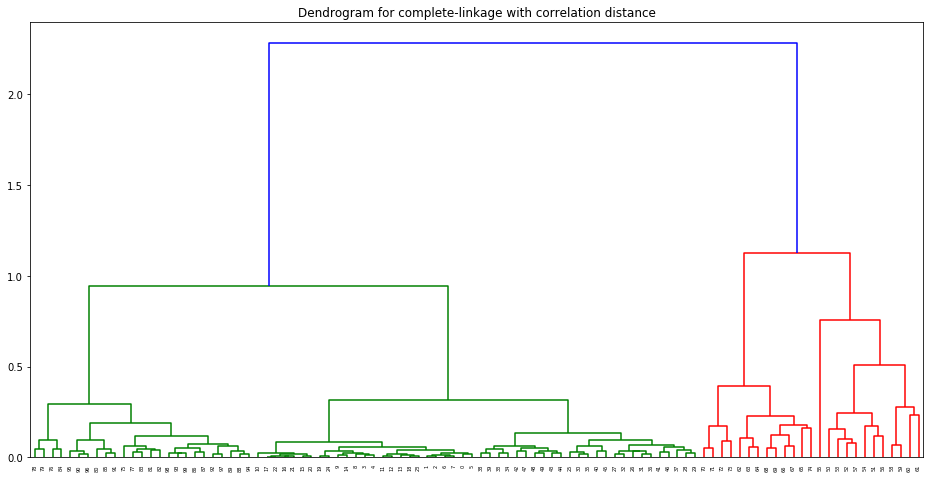

In [101]:
linkage_matrix = hierarchical_clustering(distance_matrix)